# Método de Euler para la solución de EDOs o integración numérica

Para conocer el comportamiento de la solución numérica a una ecuación diferencial ordinaria, vamos a inicar con un ejemplo. Supongamos que debemos solucionar la ecuación de un oscilador armónico amortiguado:

<img src="Sistema.bmp" width="200">

Para el sistema, partimos de la ecuación $F=ma$. Si hacemos la sumatoria de las fuerzas que actuan sobre el sistema y se tiene en cuenta que $a = \frac{d^2R(t)}{dt^2}$

$m\frac{d^2R(t)}{dt^2}=-\zeta \frac{dR(t)}{dt}-k R(t),$ siendo:

1. Constante del resorte $k$
2. Masa de la partícula $m$
3. Constante de fricción $\zeta$
4. Posición de la partícula $R(t)$
5. Fuerza de fricción $-\zeta V(t)$
6. Fuerza del resorte $-kR(t)$

Debido a que tenemos una ecuación de segundo orden, vamos a realizar la sustitución  que corresponde a la relación entre la velocidad y la posición $V(t)=\frac{dR(t)}{dt}$, de esta forma tendremos nuestras dos ecuaciones:

$$f(t,R,V)=\frac{dR(t)}{dt}=V(t) \quad (1)$$
$$F(t,R,V)=\frac{dV(t)}{dt}=\frac{1}{m}(-\zeta V(t)-kR(t)) \quad (2)$$

In [1]:
% matplotlib nbagg 
#este comando se considera como una línea mágina, y sirve para la construcción de gráficas interactivas
import numpy as np #librería numérica
import matplotlib.pyplot as plt #librería para graficar
import matplotlib.animation as animation #librería para animaciones
plt.style.use('ggplot') #este es un estilo de gráfico diferente al usual

In [2]:
#inicializamos todas las variables
dim  = 2    # dimensiones del sistema (x,y)
conteo_t = 1000 # number de pasos
R    = np.zeros(dim) # posición de la partícula
V    = np.zeros(dim) # velocidad de la partícula
Rs   = np.zeros([dim,conteo_t]) # posición de la partícula en cada instante de tiempo
Vs   = np.zeros([dim,conteo_t]) # velocidad de la partícula en cada instante de tiempo
tiempo = np.zeros(conteo_t) # vector de tiempo

In [3]:
def iniciar(): # función para inicializar la animación
    particula.set_data([], []) #definimos un elemento de animación en blanco
    linea.set_data([], []) #definimos un elemento de animación en blanco
    titulo.set_text(r'')
    return particula,linea,titulo #retornamos la inicialización

def animar(i): # definimos la animación por el método de euler
    global R,V,F,Rs,Vs,tiempo,h #variables globales
    R = R + V*h #solución por Euler para la ecuación (1) 
    V = V-zeta*V/m*h-k/m*h*R #solución por Euler para la ecuación (2)
    Rs[0:dim,i]=R #guardamos el valor para todo el tiempo
    Vs[0:dim,i]=V #guardamos el valor para todo el tiempo
    tiempo[i]=i*h #aumentamos el paso
    particula.set_data(R[0], R[1])  # creamos una partícula en la posición actual
    linea.set_data(Rs[0,0:i], Rs[1,0:i]) # Creamos la línea con la última pos
    titulo.set_text(r"$t = {0:.2f}$".format(i*h))
    return particula,linea,titulo

<IPython.core.display.Javascript object>


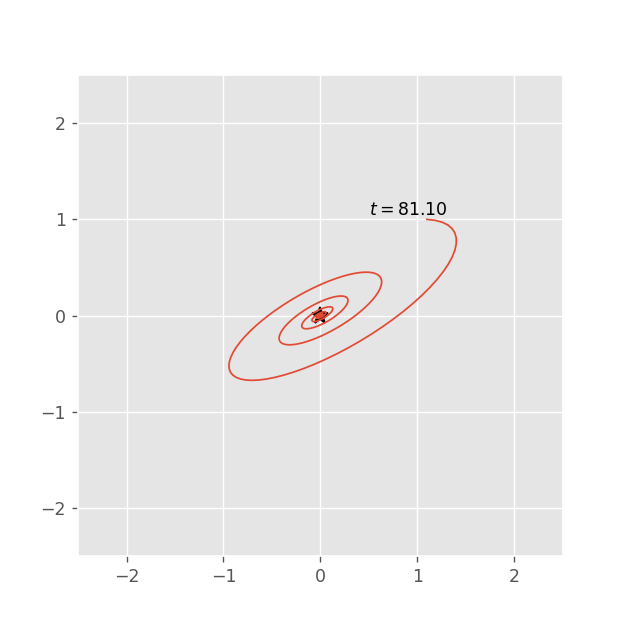

In [4]:
#corremos la función de animación
m, k, zeta = 1.0, 1.0, 0.25 #masa, cte resorte, cte fricción
# establecemos las condiciones iniciales
R[0], R[1] = 1., 1. # Rx(0), Ry(0)
V[0], V[1] = 1., 0. # Vx(0), Vy(0)
h   = 0.1*np.sqrt(k/m) # fijamos un valor para el paso
area  = 5 # tamaño para el área de dibujo

fig, ax = plt.subplots(figsize=(5,5)) # instanciamos la figura
ax = plt.axes(xlim=(-area/2,area/2),ylim=(-area/2,area/2)) # dibujamos el rango
particula, = ax.plot([],[],'k*', ms=10) # plot para la partícula

linea,=ax.plot([],[],lw=1) # plot para la trayectoria
titulo=ax.text(0.5,1.05,r'')
anim=animation.FuncAnimation(fig,animar,init_func=iniciar,
     frames=conteo_t,interval=5,blit=True,repeat=False) # draw animation
# anim.save('movie.mp4',fps=20,dpi=400)

<IPython.core.display.Javascript object>


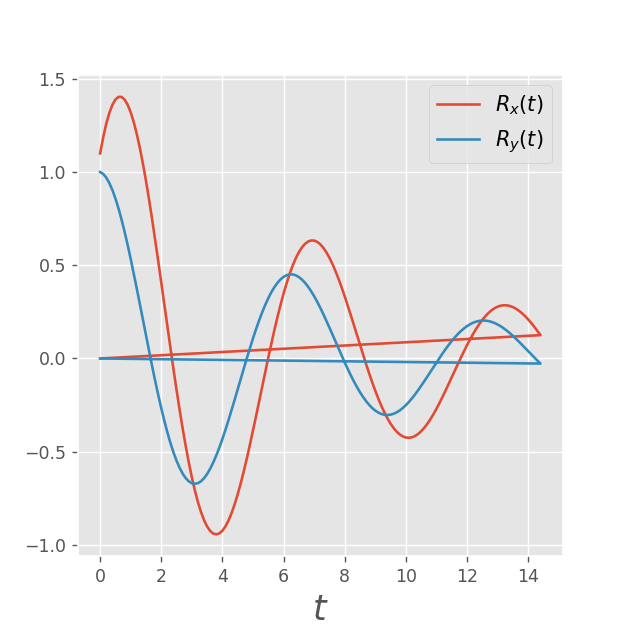

In [5]:
#Graficamos la trayectoria en x y en y
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel(r"$t$", fontsize=20)
ax.plot(tiempo,Rs[0]) # plot R_x(t)
ax.plot(tiempo,Rs[1]) # plot R_y(t)
ax.legend([r'$R_x(t)$',r'$R_y(t)$'], fontsize=12)
plt.show()

<IPython.core.display.Javascript object>


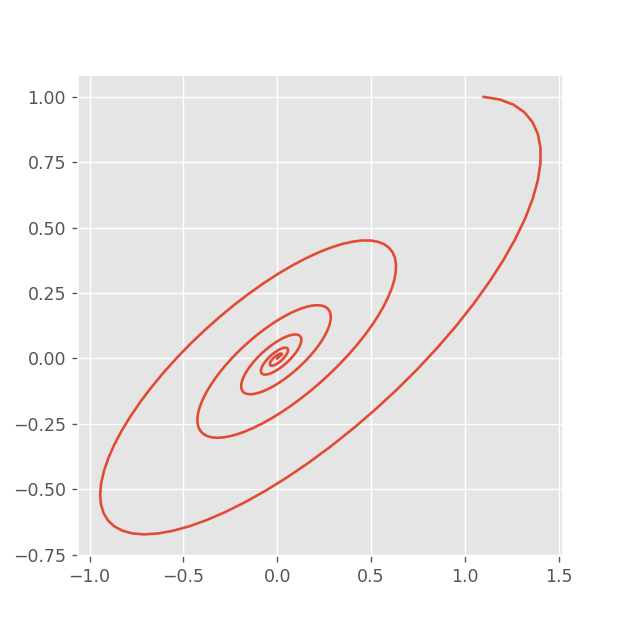

In [6]:
# se pueden hacer otro tipo de gráficas con los datos simulados
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(Rs[0], Rs[1]) #gráfica paramétrica de Rx(t) vs Ry(t)
plt.show()